## Credit card data set for Clustering

***In this notebook we are going to explore the k-means clustering algorithm on credit cards dataset and categorize the cusomers to various possible clusters.***

Data Columns
CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import StandardScaler,normalize

In [4]:
df=pd.read_csv('CC GENERAL.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
min_avg_pay=df['MINIMUM_PAYMENTS'].mean()

In [7]:
df['MINIMUM_PAYMENTS']=np.where(df['MINIMUM_PAYMENTS'].isna(),min_avg_pay,df['MINIMUM_PAYMENTS'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
avg_credit=df['CREDIT_LIMIT'].mean()

In [10]:
df['CREDIT_LIMIT']=np.where(df.CREDIT_LIMIT.isna(),avg_credit,df.CREDIT_LIMIT)

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [14]:
cols=df.columns

In [15]:
df2=df[cols[1:]]

In [16]:
df2 = pd.get_dummies(df2, columns=['TENURE'])

In [17]:
df2.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE_6,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
2450,2856.168150,1.000000,29.50,29.50,0.00,103.141056,0.100000,0.100000,0.000000,0.300000,...,508.056466,1267.375870,0.0,0,0,0,0,1,0,0
2735,30.530541,0.363636,360.10,192.00,168.10,0.000000,0.333333,0.083333,0.250000,0.000000,...,872.540799,177.175460,1.0,0,0,0,0,0,0,1
5333,952.952011,1.000000,39.58,39.58,0.00,663.058710,0.083333,0.083333,0.000000,0.083333,...,1665.457998,204.226245,0.0,0,0,0,0,0,0,1
1602,1552.772103,1.000000,34.74,34.74,0.00,185.374726,0.100000,0.100000,0.000000,0.200000,...,3125.652785,405.748783,0.0,0,0,0,0,1,0,0
3248,4064.615698,1.000000,351.00,0.00,351.00,2412.042200,0.750000,0.000000,0.666667,0.083333,...,702.914380,2615.222618,0.0,0,0,0,0,0,0,1
6170,4183.825982,1.000000,490.61,45.65,444.96,178.950075,0.666667,0.083333,0.666667,0.333333,...,1541.998312,2410.083966,0.0,0,0,0,0,0,0,1
2288,5355.922523,1.000000,2469.28,905.98,1563.30,5839.680075,0.916667,0.583333,0.833333,0.666667,...,1226.857482,2016.382990,0.0,0,0,0,0,0,0,1
7635,2230.689402,1.000000,0.00,0.00,0.00,2393.464326,0.000000,0.000000,0.000000,0.166667,...,458.732550,467.263413,0.0,0,0,0,0,0,0,1
7980,822.579064,1.000000,1188.24,0.00,1188.24,0.000000,1.000000,0.000000,1.000000,0.000000,...,1773.581187,2070.636374,0.0,0,0,0,0,0,0,1
4043,426.442669,1.000000,0.00,0.00,0.00,1619.692655,0.000000,0.000000,0.000000,0.333333,...,6270.973592,307.538576,0.2,0,0,0,0,0,0,1


### PCA

In [18]:
scaler=StandardScaler()

In [19]:
df2_scaled=scaler.fit_transform(df2)

In [20]:
df2_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.16456869,
        -0.20619412,  0.42440079],
       [ 0.78696085,  0.13432467, -0.46955188, ..., -0.16456869,
        -0.20619412,  0.42440079],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.16456869,
        -0.20619412,  0.42440079],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.16456869,
        -0.20619412, -2.35626326],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.16456869,
        -0.20619412, -2.35626326],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.16456869,
        -0.20619412, -2.35626326]])

In [21]:
pca=PCA()

In [22]:
pca.fit(df2_scaled)

PCA()

In [23]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.20376242, 0.35401224, 0.4353536 , 0.49999795, 0.55208418,
       0.59880086, 0.64367421, 0.68831521, 0.73277948, 0.77693658,
       0.82085467, 0.8575935 , 0.88908864, 0.91759359, 0.94034824,
       0.95789045, 0.97099918, 0.98155781, 0.99054238, 0.99802623,
       0.99999949, 1.        , 1.        ])

Text(0, 0.5, 'cumculative explained variance')

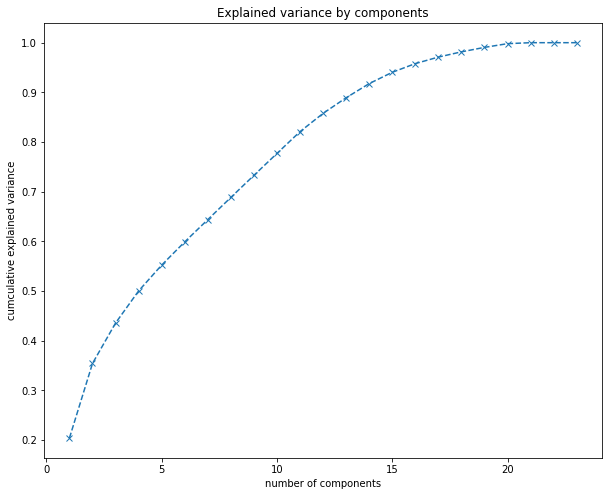

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumculative explained variance')

In [25]:
#80% of variance is accounted by 10 components
pca10=PCA(n_components=10)

In [26]:
pca10.fit(df2_scaled)

PCA(n_components=10)

In [27]:
score_pca10=pca10.transform(df2_scaled)

### K-Means clustering

In [28]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(score_pca10)
    wcss.append(kmeans_pca.inertia_)

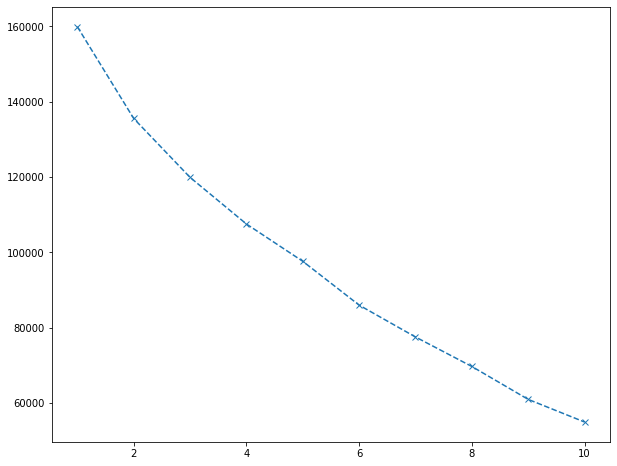

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='x', linestyle='--')

In [43]:
#we will ake 3 clusters as the curve becomes smoother afterwards
kmeans_pca=KMeans(n_clusters=3,init='k-means++',random_state=20)

In [44]:
kmeans_pca.fit_transform(score_pca10)

array([[5.68909664, 1.46399384, 4.38561231],
       [5.82851213, 3.52925436, 1.59001952],
       [3.5475673 , 2.84398237, 4.58364958],
       ...,
       [8.5554411 , 6.91978645, 8.18159322],
       [9.17510254, 6.91887735, 7.68004588],
       [8.23102466, 6.95557955, 7.62959072]])

In [45]:
pd.DataFrame(score_pca10)

,0,1,2,3,4,5,6,7,8,9
0,-1.596309,-1.117495,-0.772981,0.667055,0.276700,0.037329,0.163376,-0.051299,-0.042584,0.087578
1,-1.084219,2.468416,-0.711871,0.709409,-0.728358,0.563281,-0.284357,-0.103305,-0.015858,-0.019586
2,1.033128,-0.394545,-0.729902,0.334938,0.819725,-1.951596,0.035881,0.366805,0.110551,-0.250908
3,-0.803041,0.011147,-0.674665,1.675677,0.613327,0.299793,0.088873,0.010641,0.004656,0.312521
4,-1.513666,-0.730295,-0.924075,0.598109,0.560216,-0.419469,0.178646,0.020441,-0.037239,0.018881
...,...,...,...,...,...,...,...,...,...,...
8945,-0.532935,-1.964460,3.175001,-2.029960,-1.358887,-0.775139,-2.376523,-0.093887,-0.045129,5.132723
8946,-0.734444,-1.592288,2.894876,-2.213414,-0.427234,-0.819103,-2.037446,-0.011940,-0.017622,5.344093
8947,-1.095946,-1.766429,3.092444,-1.459286,-0.971480,-0.656301,-2.205025,-0.083024,-0.034948,5.301192
8948,-2.503939,-0.631390,3.005073,0.040749,-0.787203,-0.954862,-2.065702,-0.103503,-0.090816,5.380290


In [46]:
df2_pca_kmeans = pd.concat([df2.reset_index(drop=True), \
    pd.DataFrame(score_pca10)], axis=1)
df2_pca_kmeans.columns.values[-10:] = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10']

df2_pca_kmeans['cluster'] = kmeans_pca.labels_

In [47]:
df2_pca_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,-1.117495,-0.772981,0.667055,0.276700,0.037329,0.163376,-0.051299,-0.042584,0.087578,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,2.468416,-0.711871,0.709409,-0.728358,0.563281,-0.284357,-0.103305,-0.015858,-0.019586,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,-0.394545,-0.729902,0.334938,0.819725,-1.951596,0.035881,0.366805,0.110551,-0.250908,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.011147,-0.674665,1.675677,0.613327,0.299793,0.088873,0.010641,0.004656,0.312521,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,-0.730295,-0.924075,0.598109,0.560216,-0.419469,0.178646,0.020441,-0.037239,0.018881,1


In [48]:
df2_pca_kmeans['cluster'] = df2_pca_kmeans['cluster'].map({0:'First', 1:'Second', 2:'Third'})
df2_pca_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,-1.117495,-0.772981,0.667055,0.276700,0.037329,0.163376,-0.051299,-0.042584,0.087578,Second
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,2.468416,-0.711871,0.709409,-0.728358,0.563281,-0.284357,-0.103305,-0.015858,-0.019586,Third
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,-0.394545,-0.729902,0.334938,0.819725,-1.951596,0.035881,0.366805,0.110551,-0.250908,Second
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.011147,-0.674665,1.675677,0.613327,0.299793,0.088873,0.010641,0.004656,0.312521,Second
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,-0.730295,-0.924075,0.598109,0.560216,-0.419469,0.178646,0.020441,-0.037239,0.018881,Second


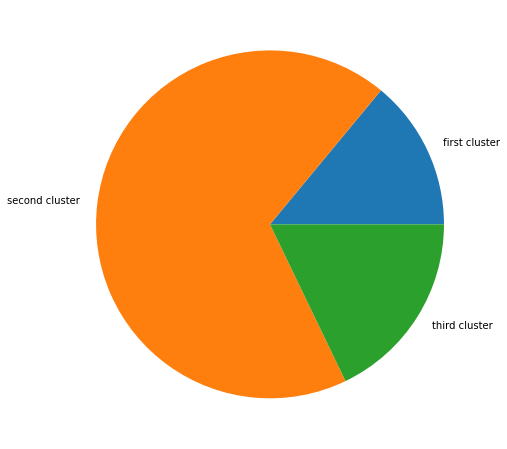

In [52]:
plt.figure(figsize = (8,8))
pie = df2_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

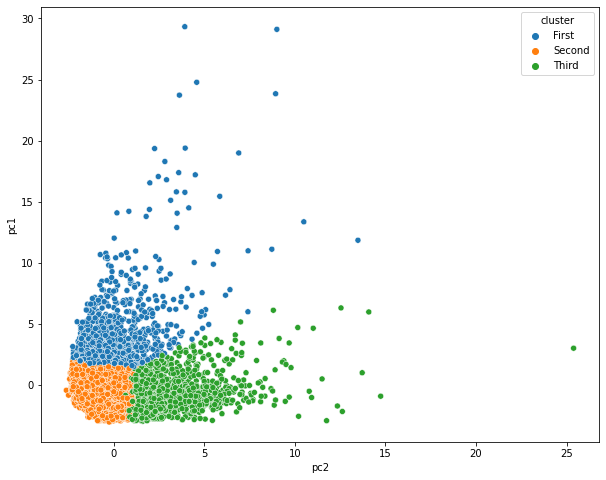

In [55]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc2', y='pc1', data=df2_pca_kmeans, hue='cluster', hue_order=['First', 'Second','Third'])
plt.show()

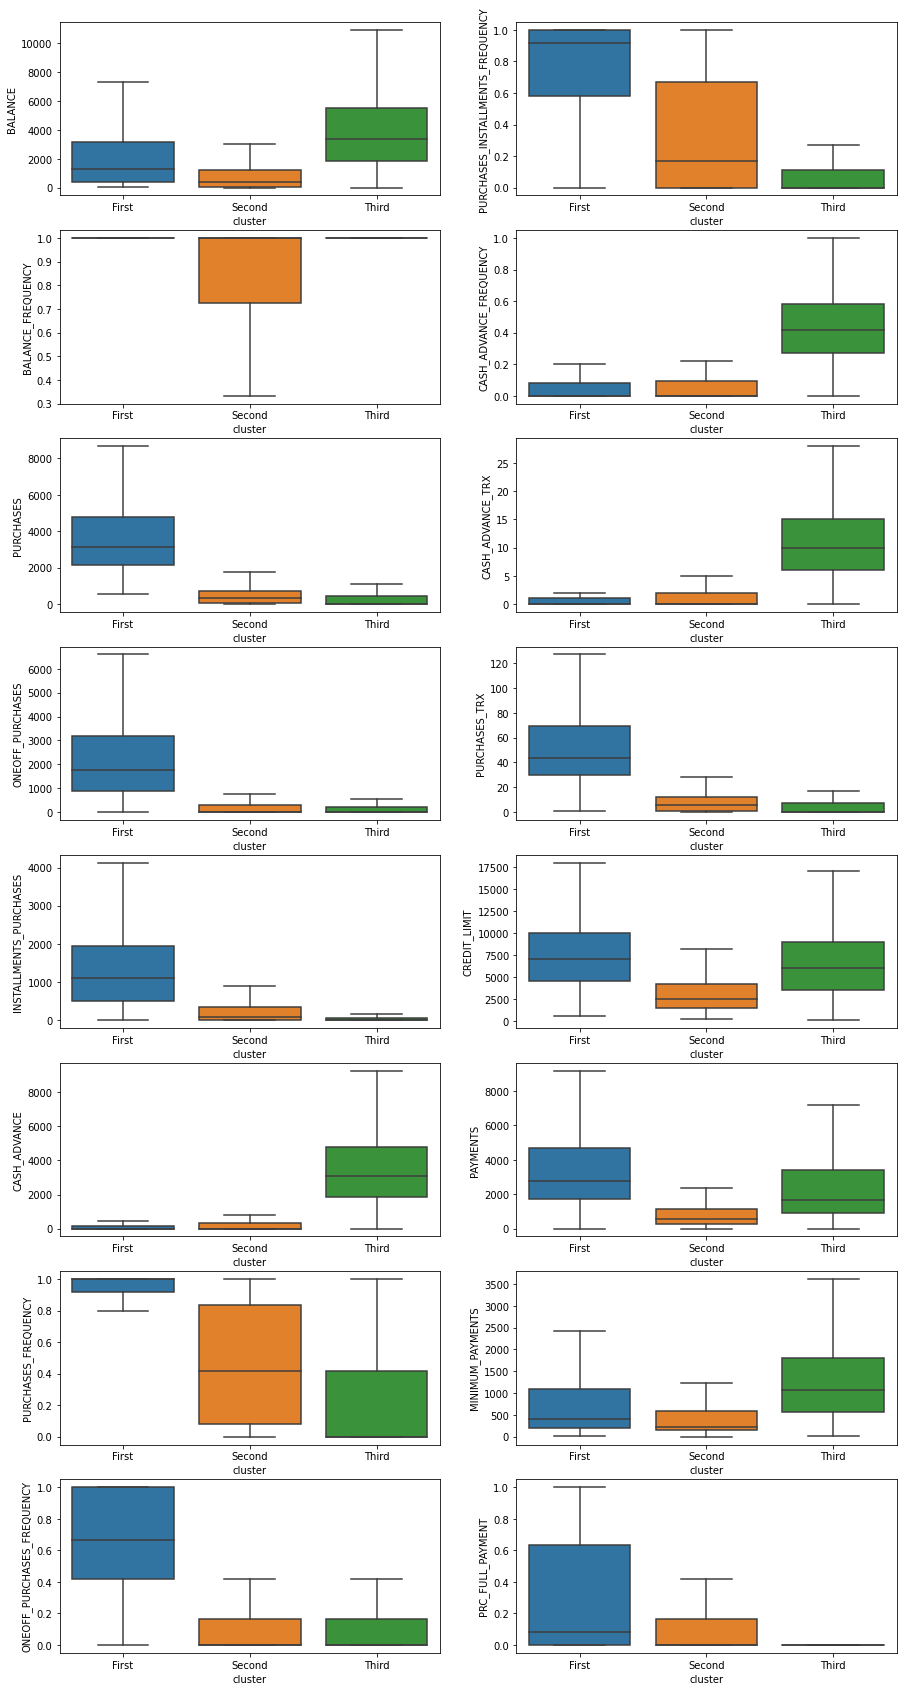

In [50]:
fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(15,30))
for cols, x in zip(df2_pca_kmeans.columns[:8], range(8)):
    for y in range(1):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = False )

for cols, x in zip(df2_pca_kmeans.columns[8:16], range(8)):
    for y in range(1,2):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = False )

In [38]:
df2_pca_kmeans.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE_6', 'TENURE_7', 'TENURE_8', 'TENURE_9', 'TENURE_10',
       'TENURE_11', 'TENURE_12', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6',
       'pc7', 'pc8', 'pc9', 'pc10', 'cluster'],
      dtype='object')

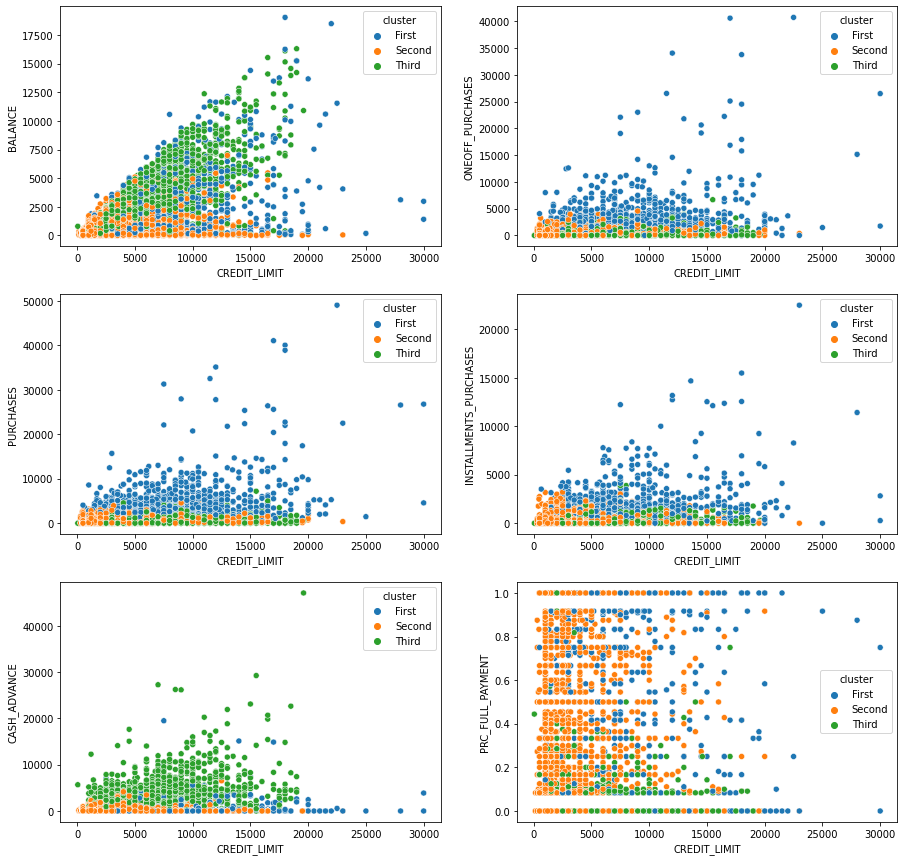

In [51]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

for cols, x in zip(['BALANCE','PURCHASES','CASH_ADVANCE'], range(3)):
    for y in range(1):
        sns.scatterplot(x='CREDIT_LIMIT',y=cols, data=df2_pca_kmeans, hue='cluster',palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third'])

for cols, x in zip(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PRC_FULL_PAYMENT'], range(3)):
    for y in range(1,2):
        sns.scatterplot(x='CREDIT_LIMIT',y=cols, data=df2_pca_kmeans, hue='cluster',palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third'])

## Results and Conclusions:

#### First group:
***Most Frequent Purchasers***
                    Persons in this group are having an average credit limit of 7500(which is higher than other two groups). These people have made their purchases mostly through the online payment mode (either by one time purchase or paid in installments). These persons have contributed the most in the total amount of purchases made. Their percentage of making the full payment is also higher(around 45-50%) than other two groups.

#### Second group:

***Installment Dependents***
                      Persons in this group are around 75% of the total persons and are having a very low average credit limit of around 2500. Their contribution in total amount of purchases is signifiacntly low though their purchases frequency is moderate. SImilar to group 1 these peolpe also do not prefer to pay cash in advance. There are variety of customers whose purchases frequency varies largly between 0.1 to 0.8.

#### Third group:

***Cash Advance payers:***
                            The persons in this category belongs to those who prefer to pay the advance amount by cash. They have an average credit limit of 7000 and the balance amount left to buy is around 4000 (which is largest of all). This implies that they are not utilizing their credit limit to the full extent. They also have the lowest percentage of full payment all. Almost negligible amount of purchases are done through installments as well as one time payment. Their contribution in total amount of purchases is very low since there are only about 15-20 % of persons in this category.